# Prepocess for DPA Contest v2

**Take the last AES-128 round SBox in as midval, additionally calculating midval with 256 key assumptions:**
$$Y(k^*) = Sbox^{-1}[C_{b_1}\oplus k^*]\oplus C_{b_2}\text{  , where } b_1=12,b_2=8$$

The raw data file `DPA_contest2_public_base_diff_vcc_a128_2009_12_23` can be downloaded from the official DPA Contest v2 website http://www.dpacontest.org/v2/download.php. It may take a while, 3.5 GBytes in total.

**Ref:** [On the Performance of Deep Learning for Side-channel Analysis](https://eprint.iacr.org/2018/004.pdf)



In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
# Fixing random state for reproducibility
np.random.seed(19680801)

trace_num = 100000
path = './Traces/DPA_contest2_public_base_diff_vcc_a128_2009_12_23'                    # use your path
all_files = glob.glob(path+"/*.csv")# advisable to use os.path.join as this makes concatenation OS independent
all_files=sorted(all_files)

In [2]:
def extract_info(all_files,trace_num):
    k = []
    m = []
    c = []
    for f in all_files[0:trace_num]:
        k_start = f.find('_k=')+3
        m_start = f.find('_m=')+3
        c_start = f.find('_c=')+3
        k.append(f[k_start:k_start+32])
        m.append(f[m_start:m_start+32])
        c.append(f[c_start:c_start+32])
        
    return k,m,c
k,m,c = extract_info(all_files,trace_num)

In [3]:
set(k)

{'0000000000000003243f6a8885a308d3'}

## Info Extraction

In [4]:
def extract_info(all_files,trace_num):
    k = []
    m = []
    c = []
    for f in all_files[0:trace_num]:
        k_start = f.find('_k=')+3
        m_start = f.find('_m=')+3
        c_start = f.find('_c=')+3
        k.append(f[k_start:k_start+32])
        m.append(f[m_start:m_start+32])
        c.append(f[c_start:c_start+32])
    return k,m,c
def aes_key_expansion(key, Nk, Nb, Nr, round_num):
    # aes256 Key Expansion
    #           Key Length  Block Size  Number of Rounds
    #            (Nk words)  (Nb words)       (Nr)
    #   AES-128     4           4             10
    #   AES-192     6           4             12
    #   AES-256     8           4             14
    #   Example for last round subkey: aes_key_expansion('0000000000000003243f6a8885a308d3',4,4,10,11)
    AES_Sbox = np.array([
        0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B,
        0xFE, 0xD7, 0xAB, 0x76, 0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0,
        0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0, 0xB7, 0xFD, 0x93, 0x26,
        0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
        0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2,
        0xEB, 0x27, 0xB2, 0x75, 0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0,
        0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84, 0x53, 0xD1, 0x00, 0xED,
        0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
        0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F,
        0x50, 0x3C, 0x9F, 0xA8, 0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5,
        0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2, 0xCD, 0x0C, 0x13, 0xEC,
        0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
        0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14,
        0xDE, 0x5E, 0x0B, 0xDB, 0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C,
        0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79, 0xE7, 0xC8, 0x37, 0x6D,
        0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
        0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F,
        0x4B, 0xBD, 0x8B, 0x8A, 0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E,
        0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E, 0xE1, 0xF8, 0x98, 0x11,
        0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
        0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F,
        0xB0, 0x54, 0xBB, 0x16
    ])
    KEY = []
    for i in range(len(AES_Sbox)):
        AES_Sbox[i] = int(AES_Sbox[i])

    w = []
    RC = [
        '0x01', '0x02', '0x04', '0x08', '0x10', '0x20', '0x40', '0x80', '0x1b',
        '0x36'
    ]
    for i in range(int(len(key) / 2)):
        KEY.append(int(key[2 * i:2 * i + 2], 16))

    for i in range(Nk):
        w.append(
            np.array([
                KEY[4 * i + 0], KEY[4 * i + 1], KEY[4 * i + 2], KEY[4 * i + 3]
            ]))

    for i in range(Nk, Nb * (Nr + 1)):
        temp = w[i - 1]
        if np.mod(i, Nk) == 0:
            Rcon = [int(RC[int(i / Nk) - 1], 16), 0, 0, 0]
            temp = AES_Sbox[np.roll(temp, -1)]
            temp = temp ^ Rcon
        elif np.mod(i, Nk) == 4 and Nk > 6:
            temp = AES_Sbox[temp]
        w.append(w[i - Nk] ^ temp)

    return np.concatenate([
        w[round_num * 4], w[round_num * 4 + 1], w[round_num * 4 + 2],
        w[round_num * 4 + 3]
    ])
def take_key(mainkey, round_num):
    subk_byte = []
    for i in range(len(k)):
        subk_byte.append(aes_key_expansion(mainkey[i], 4, 4, 10, round_num))
    return np.array(subk_byte)
def take_cipher(c):
    subc_byte = []
    for j in range(len(c)):
        subc_byte.append([])
        for i in range(16):
            subc_byte[j].append(int(c[j][2 * i:2 * i + 2], 16))
    return np.array(subc_byte)
def take_Sboxin(key, cipher):
    #take 10th round Sbox input

    AES_inverse_shiftrow = np.arange(16).reshape(4, 4).T
    for i in range(4):
        AES_inverse_shiftrow[i] = np.roll(AES_inverse_shiftrow[i], i)
    AES_inverse_shiftrow = AES_inverse_shiftrow.T.reshape(16)

    AES_Sbox = np.array([
        0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B,
        0xFE, 0xD7, 0xAB, 0x76, 0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0,
        0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0, 0xB7, 0xFD, 0x93, 0x26,
        0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
        0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2,
        0xEB, 0x27, 0xB2, 0x75, 0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0,
        0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84, 0x53, 0xD1, 0x00, 0xED,
        0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
        0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F,
        0x50, 0x3C, 0x9F, 0xA8, 0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5,
        0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2, 0xCD, 0x0C, 0x13, 0xEC,
        0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
        0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14,
        0xDE, 0x5E, 0x0B, 0xDB, 0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C,
        0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79, 0xE7, 0xC8, 0x37, 0x6D,
        0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
        0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F,
        0x4B, 0xBD, 0x8B, 0x8A, 0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E,
        0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E, 0xE1, 0xF8, 0x98, 0x11,
        0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
        0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F,
        0xB0, 0x54, 0xBB, 0x16
    ])
    for i in range(len(AES_Sbox)):
        AES_Sbox[i] = int(AES_Sbox[i])
    AES_inverse_Sbox = np.zeros(256)
    for i in range(256):
        AES_inverse_Sbox[i] = np.where(AES_Sbox == i)[0][0]
    AES_inverse_Sbox = AES_inverse_Sbox.astype(np.int64)
    
    # take 10th Sbox output
    Sbox_out = (key ^ cipher)[:, AES_inverse_shiftrow]
    # calculate key assumptions
    Sbox_out = Sbox_out.reshape(trace_num,16,1)*np.ones((256)).astype('int64')
    for i in range(256):
        Sbox_out[:,:,i] = Sbox_out[:,:,i]^i
    # calculate 10th round Sbox input
    Sbox_in = AES_inverse_Sbox[Sbox_out]
    return Sbox_in

k,m,c = extract_info(all_files,trace_num)
key = take_key(k, 10)

cipher = take_cipher(c)
sin = take_Sboxin(key, cipher)

midval = sin[:, 7, :] ^ cipher[:, 7:8]
# midval = sin[:, 0, :]

In [5]:
import numpy as np
AES_inverse_shiftrow = np.arange(16).reshape(4, 4).T
for i in range(4):
    AES_inverse_shiftrow[i] = np.roll(AES_inverse_shiftrow[i], i)
AES_inverse_shiftrow = AES_inverse_shiftrow.T.reshape(16)

In [6]:
AES_inverse_shiftrow

array([ 0, 13, 10,  7,  4,  1, 14, 11,  8,  5,  2, 15, 12,  9,  6,  3])

## Data Extraction

In [8]:
df_from_each_file = (pd.read_csv(f).loc[23:] for f in all_files[0:trace_num])
concatenated_df = pd.concat(df_from_each_file, ignore_index=True,axis=1).T
concatenated_df.head()

,23,24,25,26,27,28,29,30,31,32,...,3266,3267,3268,3269,3270,3271,3272,3273,3274,3275
0,-5011,-4625,-4180,-3932,-3763,-3512,-3452,-3676,-3892,-4164,...,74,-95,-57,99,101,-112,-337,-354,-67,714
1,-5185,-4921,-4599,-4335,-4255,-4202,-4107,-4203,-4526,-4724,...,882,1084,1172,1260,1161,413,-246,-703,-1039,-818
2,-5065,-4637,-4215,-3904,-3764,-3744,-3756,-3881,-4027,-4150,...,675,773,704,615,428,83,-258,-259,396,1188
3,-5340,-4923,-4589,-4520,-4519,-4345,-4303,-4369,-4505,-4690,...,411,447,566,392,161,-62,-295,-270,-31,566
4,-5180,-4868,-4623,-4402,-4243,-4297,-4360,-4441,-4730,-4985,...,953,903,838,750,598,158,-377,-808,-984,-883


In [9]:
data = concatenated_df.values.astype('int64')

## Known-key CPA for Leakage Detection

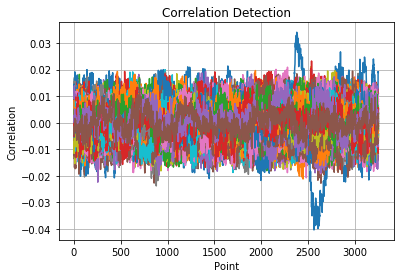

In [10]:
def corr(x, y):
    x = (x-np.mean(x,axis=0))/np.std(x,axis=0)
    x = x/np.linalg.norm(x,axis=0)
    y = (y-np.mean(y,axis=0))/np.std(y,axis=0)
    y = y/np.linalg.norm(y,axis=0)
    m = np.dot(x.T,y)
    return m

m = corr(data,midval)

plt.plot(m)
plt.grid()
plt.xlabel('Point')
plt.ylabel('Correlation')
plt.title('Correlation Detection')
plt.show()

## SNR for Leakage Detection   

In [11]:
def snr(x, y, key=0):
    mean_tmp = []
    var_tmp = []
    for i in np.unique(y[:, key]):
        index = np.where(y[:, key] == i)[0]
        mean_tmp.append(np.mean(x[index, :], axis=0))
        var_tmp.append(np.var(x[index, :], axis=0))
    snr = np.var(mean_tmp, axis=0) / np.mean(var_tmp, axis=0)
    return snr

m1 = snr(data,midval)

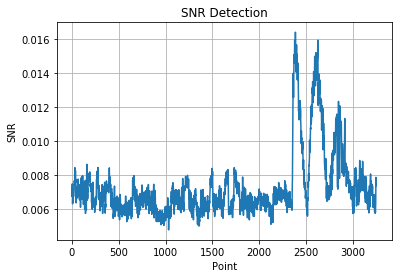

In [12]:
plt.plot(m1)
plt.grid()
plt.xlabel('Point')
plt.ylabel('SNR')
plt.title('SNR Detection')
plt.show()

## CIip the Last 1000 Points as ``noisedtrc``

In [13]:
noisedtrc = data[:,2250:3250]

In [14]:
import ipywidgets
def f(m):
    plt.figure(figsize=(20,5))
    plt.grid()
    plt.plot(noisedtrc[0:10,m[0]:m[1]].T,label='noisedtrc')
    plt.title('noisedtrc midval=0 explore')
    plt.show()
w = ipywidgets.interact(f,m=ipywidgets.IntRangeSlider(description='Zoom',value=[0,3253],min=1,max=1000))

interactive(children=(IntRangeSlider(value=(1, 1000), description='Zoom', max=1000, min=1), Output()), _dom_classes=('widget-interact',))

In [15]:
def cal_HMweight(n):
    n = (n & 0x55555555) + ((n >> 1) & 0x55555555)
    n = (n & 0x33333333) + ((n >> 2) & 0x33333333)
    n = (n & 0x0F0F0F0F) + ((n >> 4) & 0x0F0F0F0F)
    n = (n & 0x00FF00FF) + ((n >> 8) & 0x00FF00FF)
    n = (n & 0x0000FFFF) + ((n >> 16) & 0x0000FFFF)
    return n

midval_id = midval
midval_hw = cal_HMweight(midval)

tk_corr = corr(noisedtrc, midval_id[:, 0:1])
poi_id = np.argsort(-np.abs(tk_corr.T)).T
tk_corr = corr(noisedtrc, midval_hw[:, 0:1])
poi_hw = np.argsort(-np.abs(tk_corr.T)).T

trc_index_hw = []
for i in range(9):
    trc_index_hw.append(np.where(midval_hw[:,0]==i)[0])
    
trc_index_id = []
for i in range(256):
    trc_index_id.append(np.where(midval_id[:,0]==i)[0])

In [16]:
def take_cleantrc(noisedtrc,midval):
    cleantrc_set = np.zeros((256,noisedtrc.shape[1]))
    cleantrc = np.zeros(noisedtrc.shape)
    for i in np.unique(midval[:,0]):
        pos = np.where(midval[:,0]==i)[0]
        cleantrc_set[i,:] = np.mean(noisedtrc[pos,:],axis=0,keepdims=1)
    for i in range(noisedtrc.shape[0]):
        cleantrc[i,:] = cleantrc_set[midval[i,0],:]
    return cleantrc
cleantrc_id =take_cleantrc(noisedtrc,midval)
cleantrc_hw =take_cleantrc(noisedtrc,midval_hw)

## Explore Histogram of the 9 most-reletive PoI using HammingWeight model   

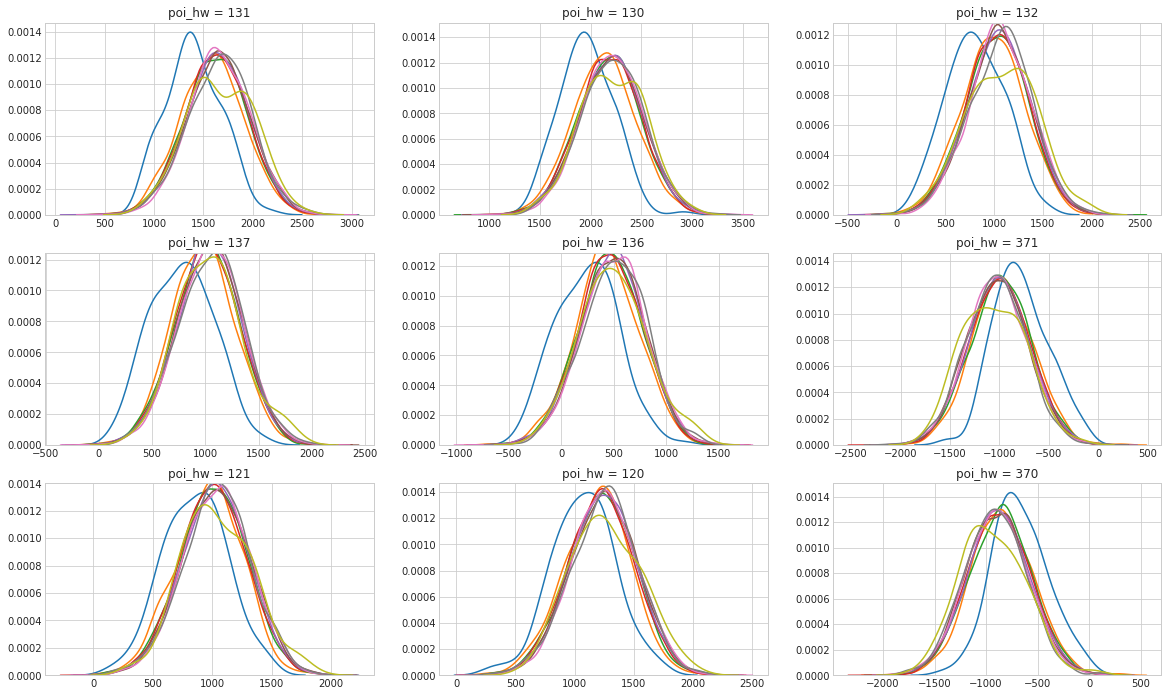

In [17]:
import seaborn as sns
sns.set_style("whitegrid") 

plt.figure(figsize=(20,12))
plt.title('HW distribution in top 9 PoI')
for j in range(9):
    plt.subplot(3,3,j+1)
    for i in range(9):
        sns.distplot(noisedtrc[trc_index_hw[i],poi_hw[j]],hist=False)
    plt.title('poi_hw = %s'%poi_hw[j,0])

## Explore Histogram of the 9 most-reletive PoI using ID model    

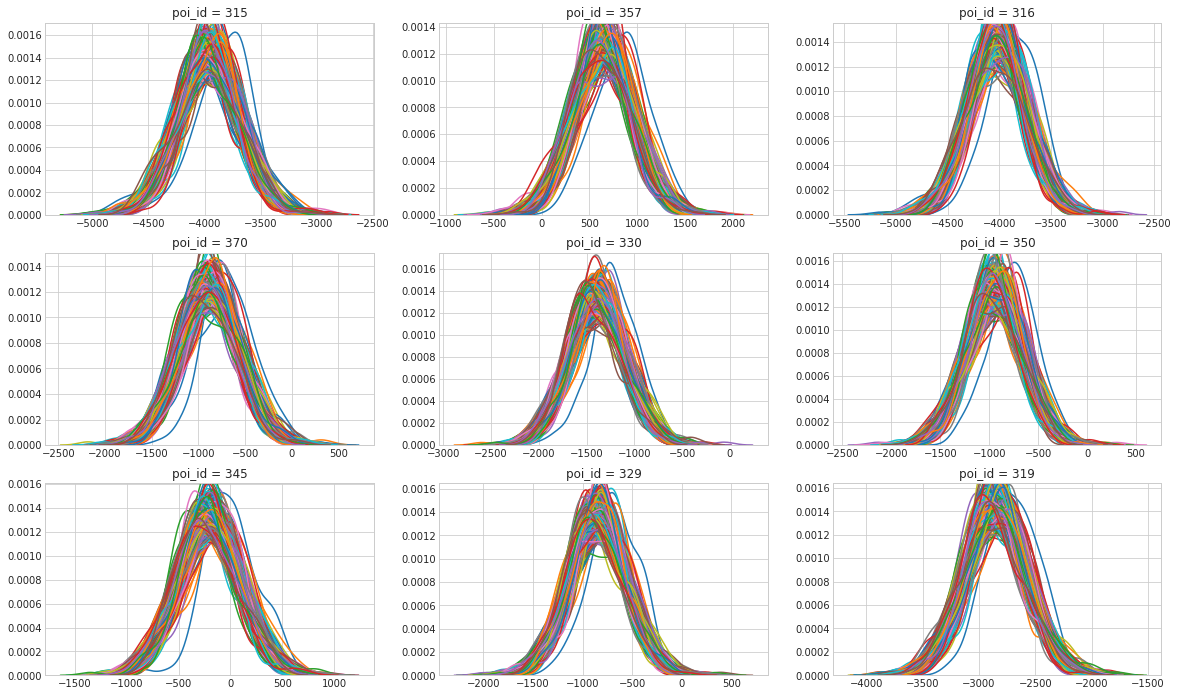

In [18]:
plt.figure(figsize=(20,12))
plt.title('HW joint distribution in top 9 PoI')
for j in range(9):
    plt.subplot(3,3,j+1)
    for i in range(256):
        sns.distplot(noisedtrc[trc_index_id[i],poi_id[j]],hist=False)
    plt.title('poi_id = %s'%poi_id[j,0])


## Detailed relation of the 2 most-reletive PoI using HammingWeight model 

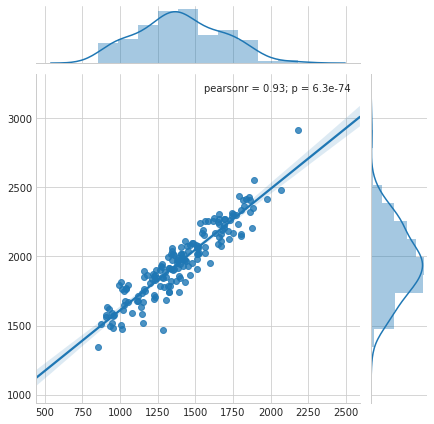

In [19]:
sns.jointplot(x=noisedtrc[trc_index_hw[0],poi_hw[0]], y=noisedtrc[trc_index_hw[0],poi_hw[1]],kind='reg')
plt.show()

In [62]:
import scipy.io as scio
# 100000 trc
scio.savemat('./Traces/raw_trc_dpav2_s8_id_mean.mat',{'noisedtrc':noisedtrc,'cleantrc_id':cleantrc_id,
                                             'v_id':midval_id,'c8':cipher[:, 7:8],'key':key[:,11:12]})